# Data Preparation - LMA Features Data

### Note: Datasets follow the format preprocess_datasetname
So we have, for example: Fs_B_dataset1.csv -> Dataset was first Feature Selected and then Balanced

Fs - Feature Selected

B - Balanced

N - Normalized

S - Standardized

## Imports

In [144]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import joblib
from collections import Counter
import numpy as np

### Load Dataset

In [145]:
data = pd.read_csv('datasets/BANDAI_05sec.csv')

In [146]:
data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,0.433596,0.158604,0.262368,0.538619,0.204290,0.286321,0.174445,0.107800,0.236151,0.223894,...,0.544719,0.747464,0.783573,2.388999,2.320488,1.089438,1.494928,0.05,-0.4,0.0
1,0.502380,0.348371,0.141433,0.355769,0.308451,0.226158,0.114087,0.185519,0.236151,0.223894,...,0.375438,0.813410,1.279194,1.685722,0.708942,0.661071,0.783065,0.05,-0.4,0.0
2,0.523859,0.430275,0.176769,0.588712,0.337860,0.209359,0.111133,0.249847,0.236151,0.223894,...,0.343913,0.897555,0.762036,0.337886,0.417700,0.325002,0.209341,0.05,-0.4,0.0
3,0.506404,0.372590,0.182689,0.671607,0.304908,0.199841,0.092428,0.244035,0.236151,0.223894,...,1.118295,0.912977,1.376315,0.773128,0.324001,1.594570,0.748233,0.05,-0.4,0.0
4,0.399879,0.189986,0.280258,0.595205,0.236768,0.250473,0.108253,0.145548,0.236151,0.223894,...,1.306542,0.828419,0.436481,0.562979,1.256880,0.433401,0.184292,0.05,-0.4,0.0


## Feature Selection

In [147]:
data = pd.read_csv('datasets/BANDAI_05sec.csv')

In [148]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,0.433596,0.158604,0.262368,0.538619,0.204290,0.286321,0.174445,0.107800,0.236151,0.223894,...,0.391787,1.194499,1.160244,0.544719,0.747464,0.783573,2.388999,2.320488,1.089438,1.494928
1,0.502380,0.348371,0.141433,0.355769,0.308451,0.226158,0.114087,0.185519,0.236151,0.223894,...,0.807009,1.046016,1.007270,0.375438,0.813410,1.279194,1.685722,0.708942,0.661071,0.783065
2,0.523859,0.430275,0.176769,0.588712,0.337860,0.209359,0.111133,0.249847,0.236151,0.223894,...,0.989961,0.908436,1.027262,0.343913,0.897555,0.762036,0.337886,0.417700,0.325002,0.209341
3,0.506404,0.372590,0.182689,0.671607,0.304908,0.199841,0.092428,0.244035,0.236151,0.223894,...,1.082582,0.689009,1.158406,1.118295,0.912977,1.376315,0.773128,0.324001,1.594570,0.748233
4,0.399879,0.189986,0.280258,0.595205,0.236768,0.250473,0.108253,0.145548,0.236151,0.223894,...,1.172738,0.480506,0.535663,1.306542,0.828419,0.436481,0.562979,1.256880,0.433401,0.184292


### Variance Analysis

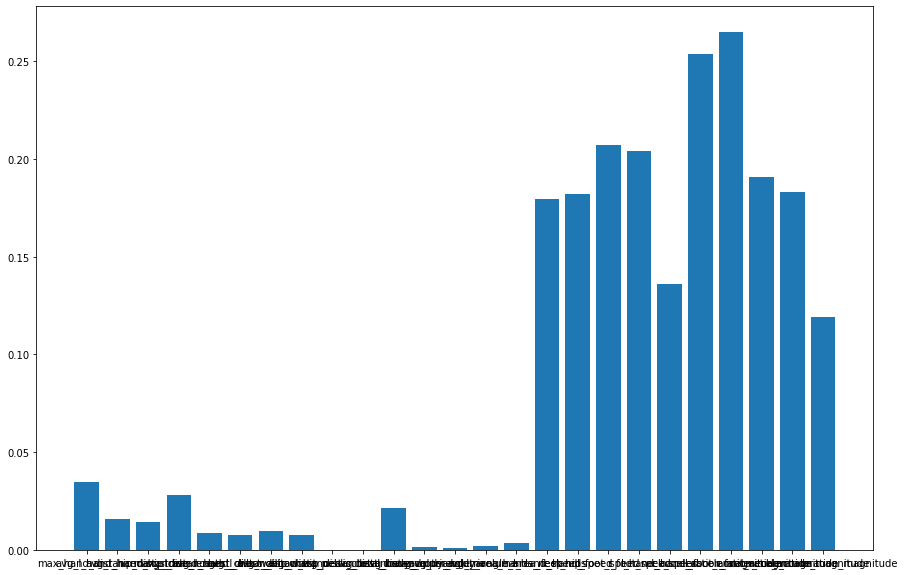

max_hand_distance  -  0.03491304733644578
avg_l_hand_hip_distance  -  0.015868281287816956
avg_r_hand_hip_distance  -  0.014470554404917197
max_stride_length  -  0.028326866850222364
avg_l_hand_chest_distance  -  0.008806980415674723
avg_r_hand_chest_distance  -  0.007524396751399415
avg_l_elbow_hip_distance  -  0.009428897483786723
avg_r_elbow_hip_distance  -  0.007645592871625331
avg_chest_pelvis_distance  -  6.060942455585641e-16
avg_neck_chest_distance  -  8.251987887671059e-16
avg_total_body_volume  -  0.02126605667388229
avg_lower_body_volume  -  0.0012868425380496526
avg_upper_body_volume  -  0.0008923110730820687
avg_triangle_area_hands_neck  -  0.001767042477456042
avg_triangle_area_feet_hips  -  0.003674808241390709
l_hand_speed  -  0.17967173410709683
r_hand_speed  -  0.18190320702039542
l_foot_speed  -  0.20693281681638995
r_foot_speed  -  0.2040053348480265
neck_speed  -  0.13585843176626808
l_hand_acceleration_magnitude  -  0.253664206475688
r_hand_acceleration_magnitude 

In [149]:
x_fs = []
y_fs = []
for i in data.columns:
    x_fs.append(data[i].var())
    y_fs.append(i)


fig, ax = plt.subplots(figsize=(15,10))

ax.bar(y_fs, x_fs)

plt.show()

for i in data.columns:
    print(i, " - ", data[i].var())

### Remove highly correlated features

In [150]:
data = pd.read_csv('datasets/BANDAI_05sec.csv')

In [151]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,0.433596,0.158604,0.262368,0.538619,0.204290,0.286321,0.174445,0.107800,0.236151,0.223894,...,0.391787,1.194499,1.160244,0.544719,0.747464,0.783573,2.388999,2.320488,1.089438,1.494928
1,0.502380,0.348371,0.141433,0.355769,0.308451,0.226158,0.114087,0.185519,0.236151,0.223894,...,0.807009,1.046016,1.007270,0.375438,0.813410,1.279194,1.685722,0.708942,0.661071,0.783065
2,0.523859,0.430275,0.176769,0.588712,0.337860,0.209359,0.111133,0.249847,0.236151,0.223894,...,0.989961,0.908436,1.027262,0.343913,0.897555,0.762036,0.337886,0.417700,0.325002,0.209341
3,0.506404,0.372590,0.182689,0.671607,0.304908,0.199841,0.092428,0.244035,0.236151,0.223894,...,1.082582,0.689009,1.158406,1.118295,0.912977,1.376315,0.773128,0.324001,1.594570,0.748233
4,0.399879,0.189986,0.280258,0.595205,0.236768,0.250473,0.108253,0.145548,0.236151,0.223894,...,1.172738,0.480506,0.535663,1.306542,0.828419,0.436481,0.562979,1.256880,0.433401,0.184292


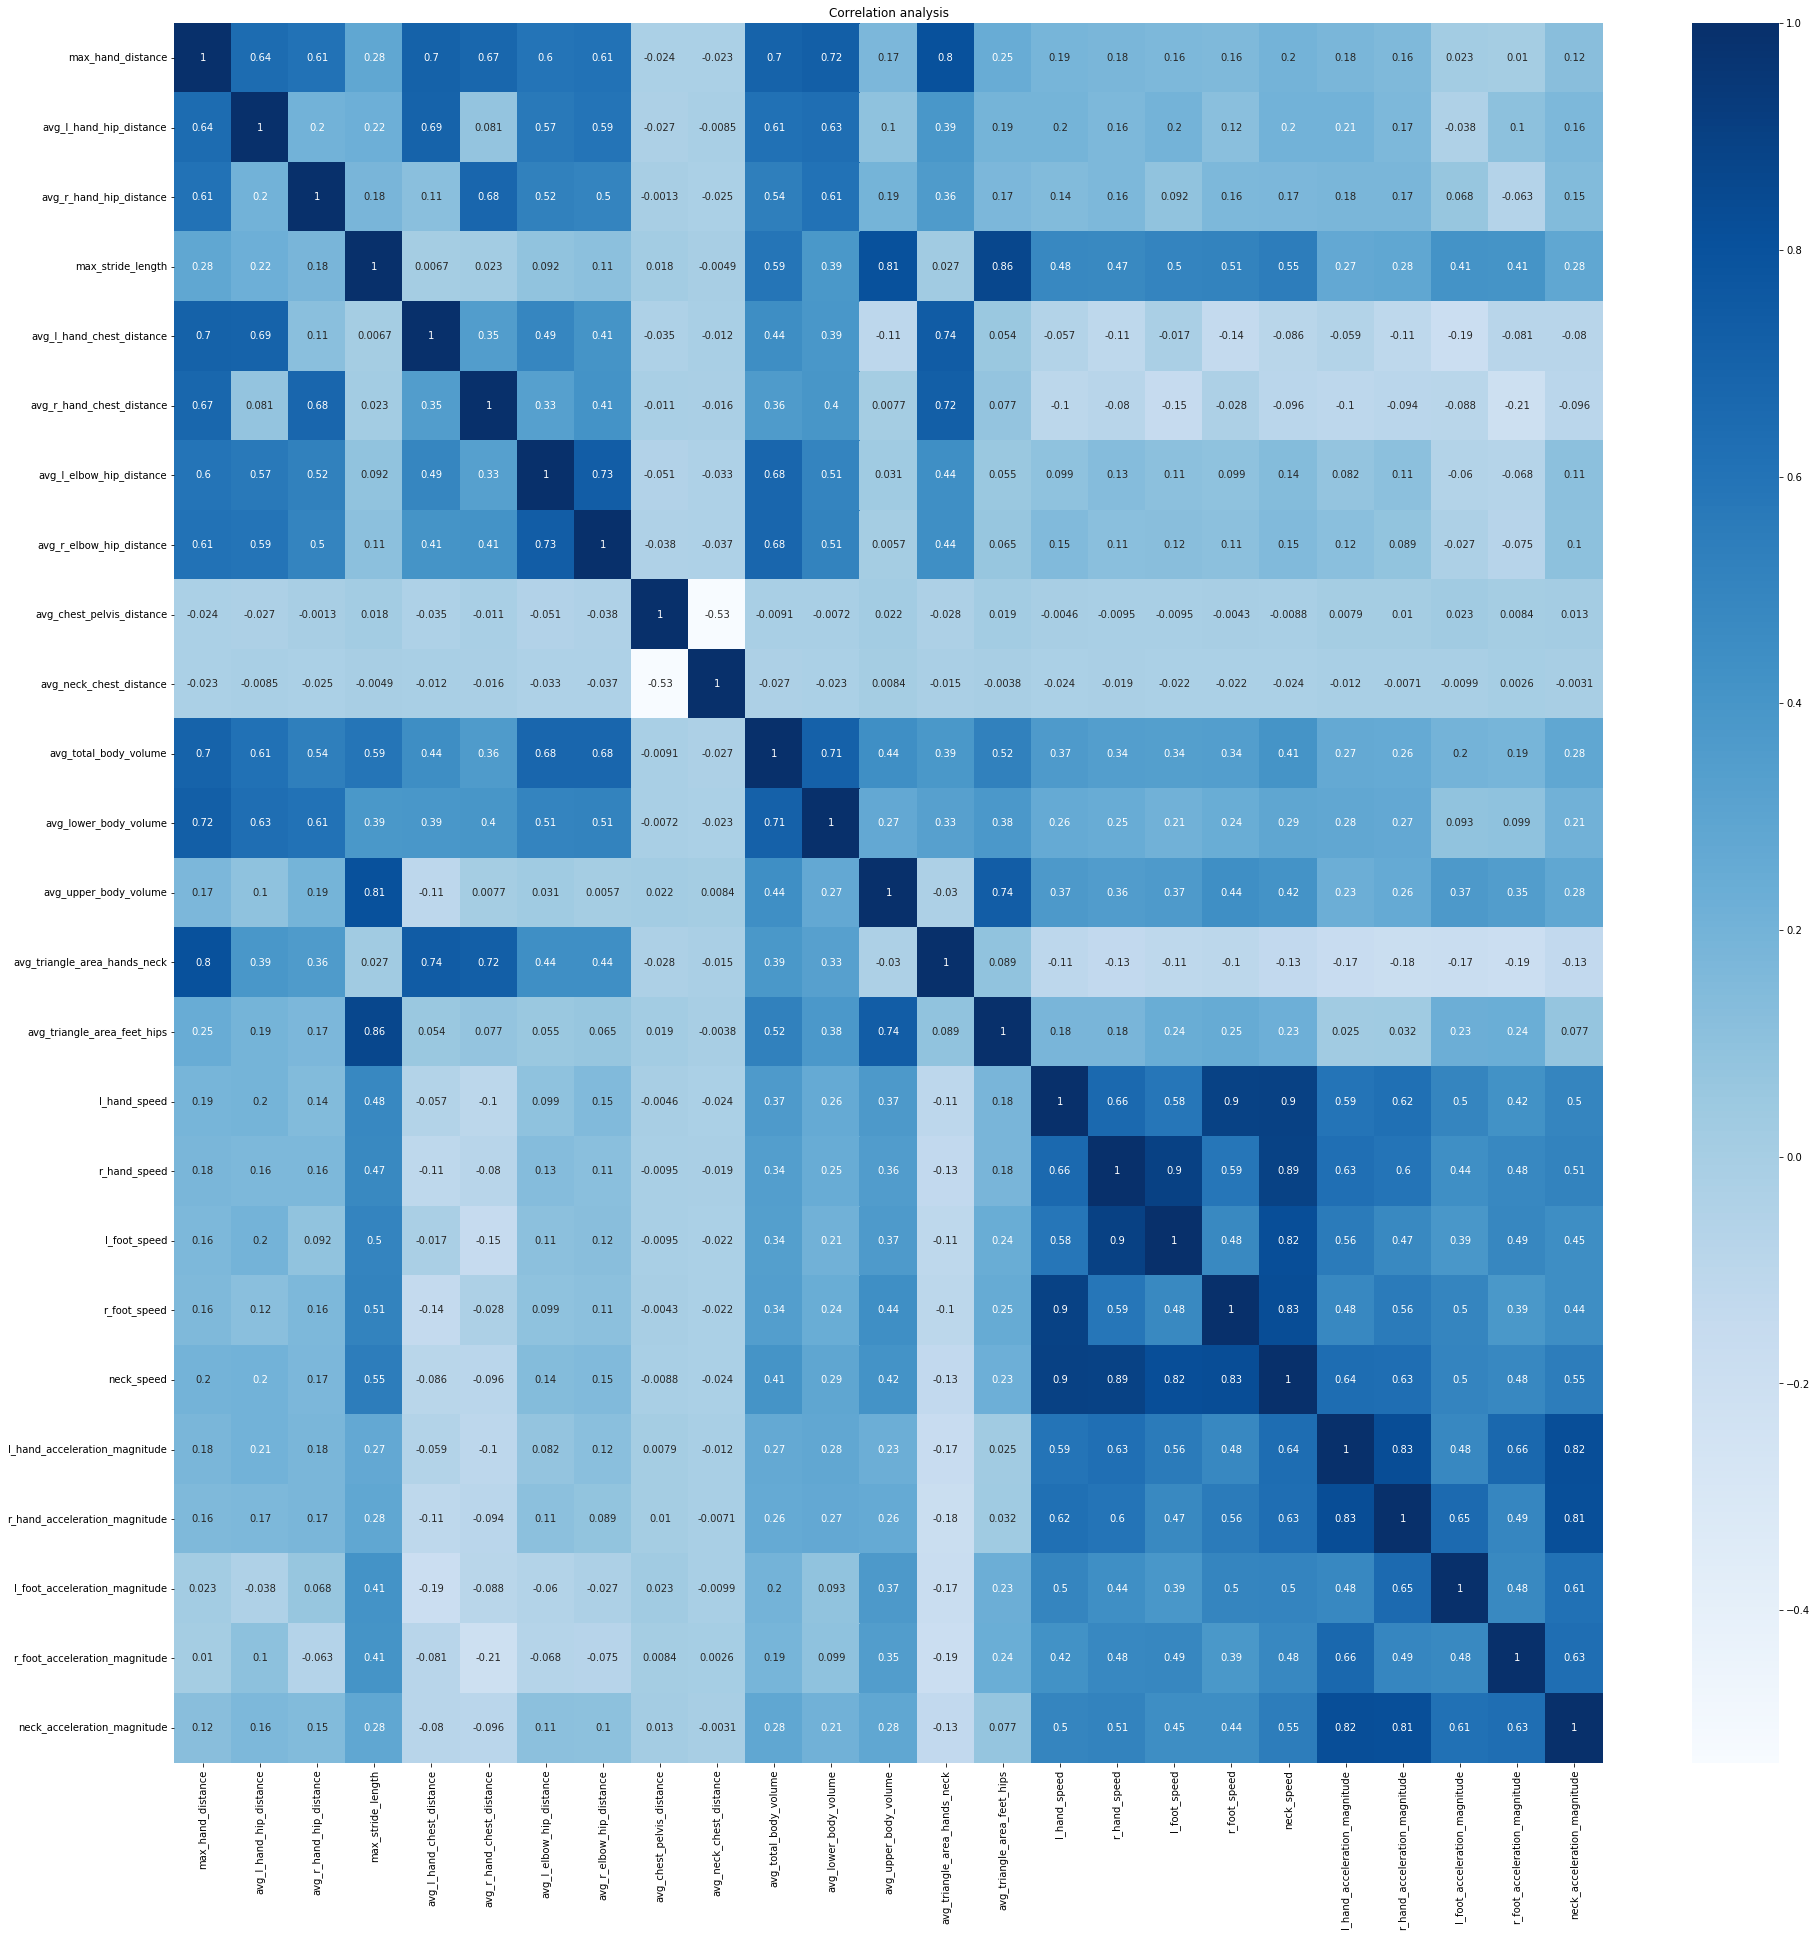

In [152]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [153]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

[]


In [154]:
df = pd.read_csv('datasets/BANDAI_05sec.csv')

cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["EMOTION_P"])
print("===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_A"])
print("\n===CORRELATION BETWEEN VAR AND AROUSAL COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_D"])
print("\n===CORRELATION BETWEEN VAR AND DOMINANCE COORDINATE===")
print(cor_target)

===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===
max_hand_distance                0.377050
avg_l_hand_hip_distance          0.151241
avg_r_hand_hip_distance          0.122583
max_stride_length                0.274725
avg_l_hand_chest_distance        0.203067
avg_r_hand_chest_distance        0.211134
avg_l_elbow_hip_distance         0.019950
avg_r_elbow_hip_distance         0.014648
avg_chest_pelvis_distance        0.023397
avg_neck_chest_distance          0.000932
avg_total_body_volume            0.265778
avg_lower_body_volume            0.340442
avg_upper_body_volume            0.180571
avg_triangle_area_hands_neck     0.211967
avg_triangle_area_feet_hips      0.213619
l_hand_speed                     0.180153
r_hand_speed                     0.175143
l_foot_speed                     0.153360
r_foot_speed                     0.153074
neck_speed                       0.184240
l_hand_acceleration_magnitude    0.210330
r_hand_acceleration_magnitude    0.195254
l_foot_acceleration_ma

## Outliers

In [186]:
from scipy import stats

In [208]:
data = pd.read_csv('datasets/BANDAI_05sec.csv')
print(data.shape)

(26036, 28)


In [209]:
data.iloc[0]

max_hand_distance                0.433596
avg_l_hand_hip_distance          0.158604
avg_r_hand_hip_distance          0.262368
max_stride_length                0.538619
avg_l_hand_chest_distance        0.204290
avg_r_hand_chest_distance        0.286321
avg_l_elbow_hip_distance         0.174445
avg_r_elbow_hip_distance         0.107800
avg_chest_pelvis_distance        0.236151
avg_neck_chest_distance          0.223894
avg_total_body_volume            0.214717
avg_lower_body_volume            0.062277
avg_upper_body_volume            0.093622
avg_triangle_area_hands_neck     0.065018
avg_triangle_area_feet_hips      0.144140
l_hand_speed                     0.391787
r_hand_speed                     1.194499
l_foot_speed                     1.160244
r_foot_speed                     0.544719
neck_speed                       0.747464
l_hand_acceleration_magnitude    0.783573
r_hand_acceleration_magnitude    2.388999
l_foot_acceleration_magnitude    2.320488
r_foot_acceleration_magnitude    1

In [210]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data.shape

(23570, 28)

In [211]:
data.iloc[0]

max_hand_distance                0.502380
avg_l_hand_hip_distance          0.348371
avg_r_hand_hip_distance          0.141433
max_stride_length                0.355769
avg_l_hand_chest_distance        0.308451
avg_r_hand_chest_distance        0.226158
avg_l_elbow_hip_distance         0.114087
avg_r_elbow_hip_distance         0.185519
avg_chest_pelvis_distance        0.236151
avg_neck_chest_distance          0.223894
avg_total_body_volume            0.232280
avg_lower_body_volume            0.069039
avg_upper_body_volume            0.067281
avg_triangle_area_hands_neck     0.077002
avg_triangle_area_feet_hips      0.086540
l_hand_speed                     0.807009
r_hand_speed                     1.046016
l_foot_speed                     1.007270
r_foot_speed                     0.375438
neck_speed                       0.813410
l_hand_acceleration_magnitude    1.279194
r_hand_acceleration_magnitude    1.685722
l_foot_acceleration_magnitude    0.708942
r_foot_acceleration_magnitude    0

In [212]:
data.to_csv(r'datasets/O_BANDAI_05sec.csv', index = False)

## Data Standardization

In [222]:
data = pd.read_csv('datasets/O_BANDAI_05sec.csv')

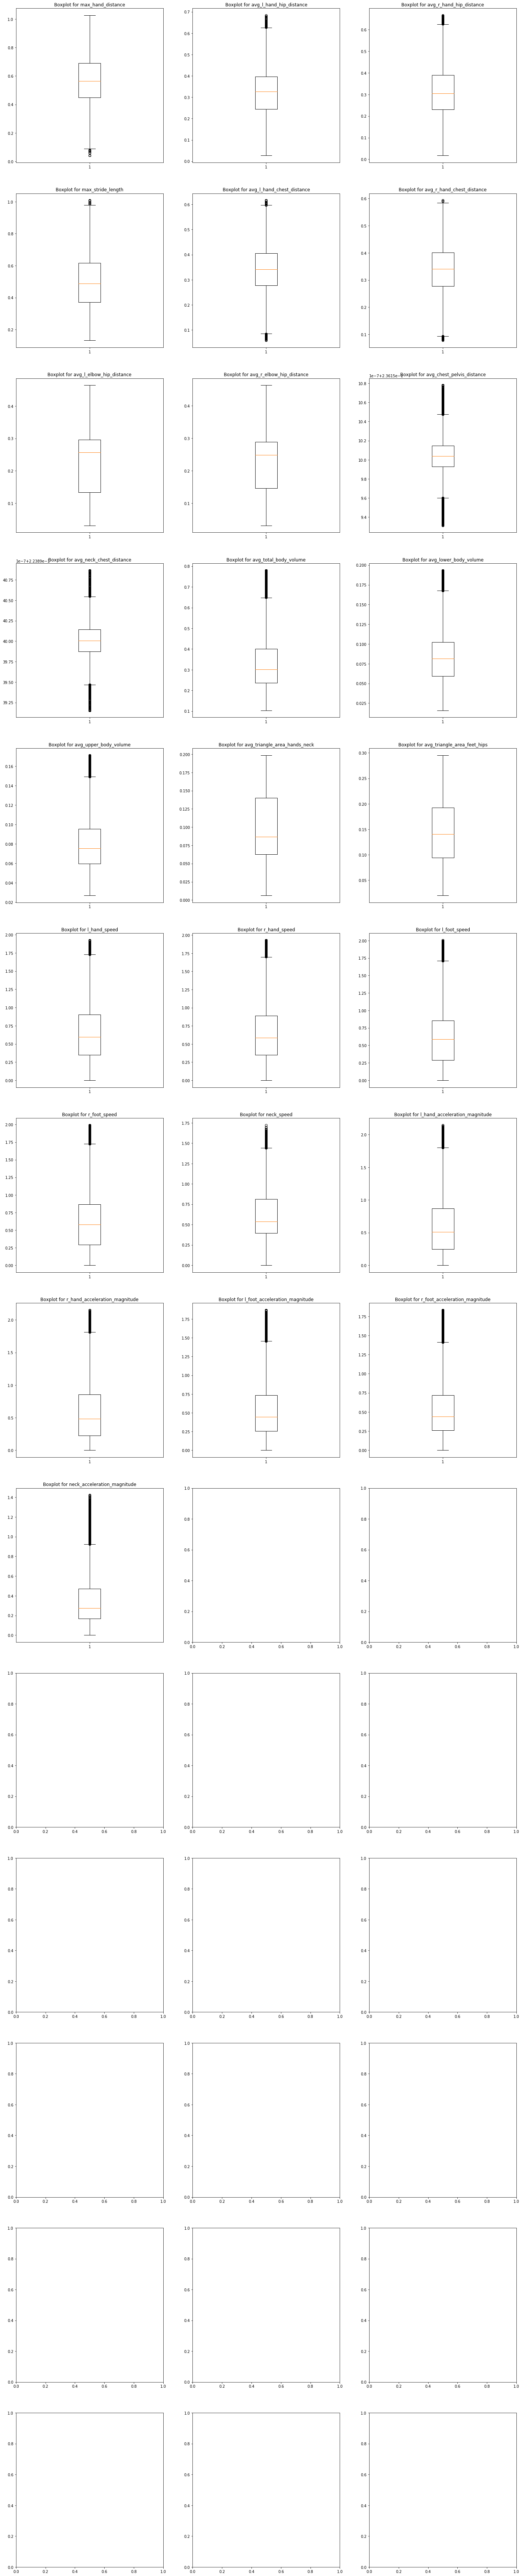

In [223]:
target = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)

numeric_vars = data.columns

rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    
    i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
    
plt.show()

In [224]:
numeric_data = data

transf = StandardScaler(copy=True).fit(numeric_data)
minMaxData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)
minMaxData.describe(include='all')

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
count,2.357000e+04,2.357000e+04,2.357000e+04,2.357000e+04,2.357000e+04,2.357000e+04,2.357000e+04,2.357000e+04,2.357000e+04,2.357000e+04,...,2.357000e+04,2.357000e+04,2.357000e+04,2.357000e+04,2.357000e+04,2.357000e+04,2.357000e+04,2.357000e+04,23570.000000,2.357000e+04
mean,4.895721e-16,3.412534e-16,-1.302310e-16,-9.887909e-17,4.341033e-17,2.767409e-16,-1.085258e-16,4.341033e-17,-1.217687e-09,1.405053e-09,...,-5.305707e-17,-8.440898e-17,-2.025816e-16,-1.447011e-17,2.652854e-17,-1.664063e-16,5.788044e-17,9.284988e-17,0.000000,3.014606e-17
std,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,...,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021,1.000021e+00
min,-2.878535e+00,-2.353723e+00,-2.427029e+00,-2.312535e+00,-3.083257e+00,-3.026514e+00,-2.062715e+00,-2.279629e+00,-3.968428e+00,-3.923644e+00,...,-1.646607e+00,-1.635648e+00,-1.486864e+00,-1.488894e+00,-1.824800e+00,-1.372749e+00,-1.322513e+00,-1.461554e+00,-1.479553,-1.352647e+00
25%,-6.387028e-01,-5.820897e-01,-6.293960e-01,-7.883958e-01,-6.573058e-01,-6.802188e-01,-9.935048e-01,-9.399831e-01,-6.014682e-01,-6.188633e-01,...,-7.577255e-01,-7.422086e-01,-8.078313e-01,-8.007584e-01,-6.540314e-01,-8.086448e-01,-8.191582e-01,-7.499771e-01,-0.743255,-7.050116e-01
50%,7.447435e-03,9.504141e-02,-4.571852e-03,-4.822344e-02,5.439215e-02,5.337436e-02,2.993388e-01,2.402033e-01,-8.291603e-03,-9.082102e-04,...,-1.313802e-01,-1.439192e-01,-1.012489e-01,-1.227282e-01,-2.201133e-01,-2.008266e-01,-2.298055e-01,-2.270519e-01,-0.218906,-3.116214e-01
75%,7.018369e-01,6.683269e-01,6.977999e-01,7.567212e-01,7.638733e-01,7.618182e-01,7.223720e-01,7.200042e-01,5.916256e-01,6.186136e-01,...,6.441498e-01,6.276746e-01,5.313342e-01,5.544363e-01,5.949572e-01,6.159914e-01,6.193599e-01,5.818032e-01,0.571414,4.446668e-01
max,2.544936e+00,3.004394e+00,3.025601e+00,3.250518e+00,3.104267e+00,3.017823e+00,2.479275e+00,2.745404e+00,4.038819e+00,3.941362e+00,...,3.242536e+00,3.267056e+00,3.236774e+00,3.216165e+00,3.304415e+00,3.538489e+00,3.545514e+00,3.726775e+00,3.736169,4.064985e+00


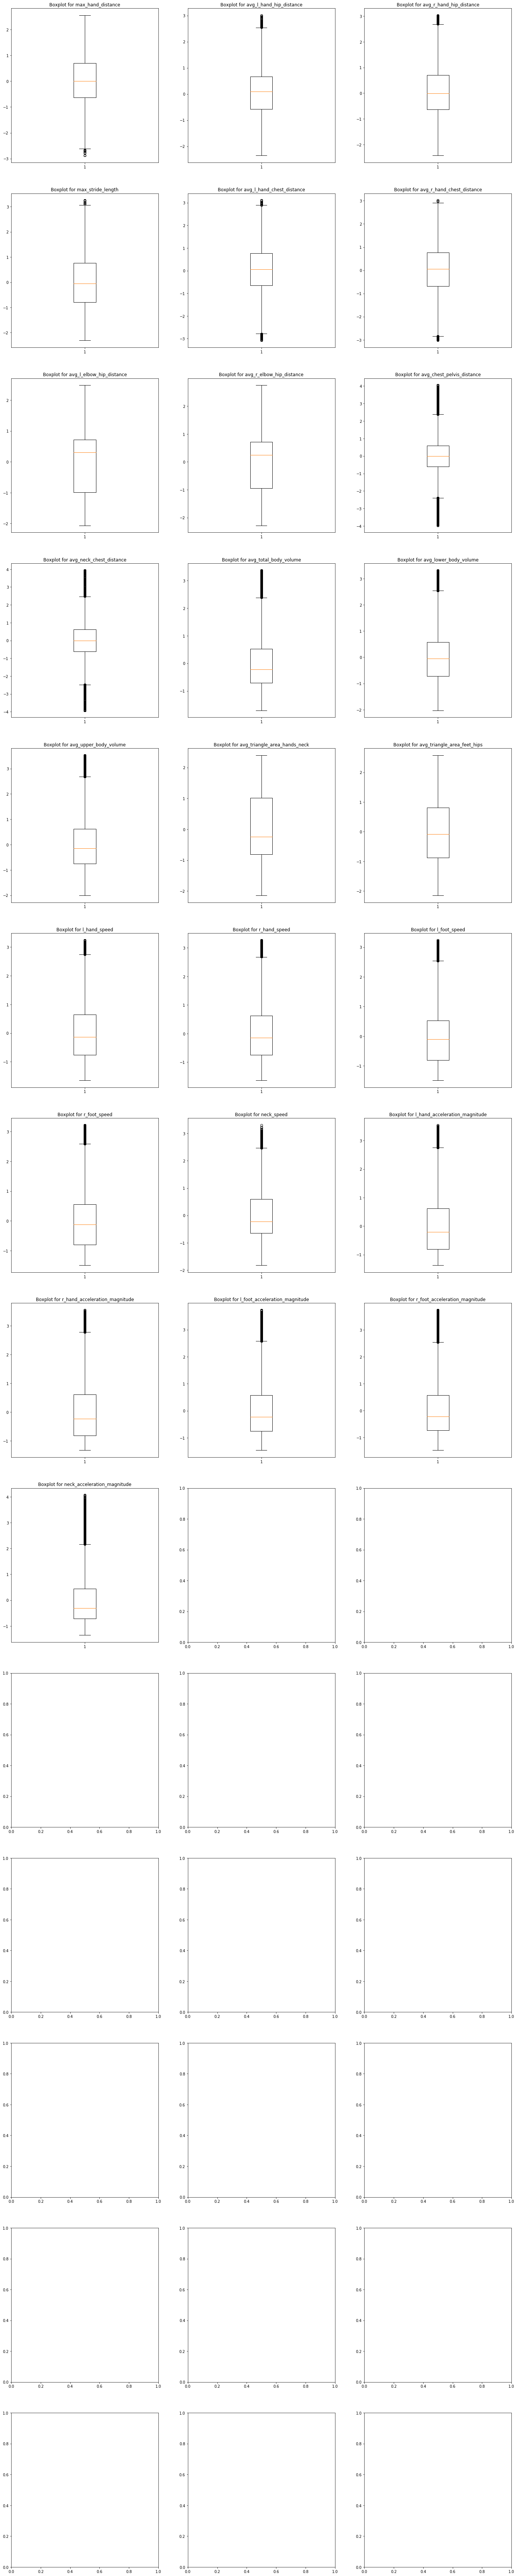

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,-0.336667,0.270393,-1.384520,-0.888965,-0.306071,-1.285732,-1.193829,-0.485572,-1.618464,-1.033570,...,0.402960,1.021761,0.886225,-0.602116,0.598418,1.556339,2.494044,0.505658,0.403451,1.629579
1,-0.218278,0.938854,-1.087400,0.588627,0.019790,-1.482802,-1.224854,0.265034,-3.811932,0.568251,...,0.867607,0.672237,0.933327,-0.676577,0.849093,0.372155,-0.557523,-0.302498,-0.553812,-0.555393
2,-0.901629,-1.022274,-0.217194,0.629808,-1.100340,-1.000485,-1.255098,-0.951970,1.462392,-0.927365,...,1.331806,-0.414919,-0.224861,1.597134,0.643132,-0.373298,-0.047901,2.026107,-0.245047,-0.650790
3,-0.455807,-1.531477,1.181175,-0.694669,-1.890809,0.131375,-0.484917,-1.312677,0.308625,-0.662063,...,1.282236,1.092671,0.042941,1.627656,1.227099,2.332770,1.456129,-0.084970,0.861643,2.449642
4,-0.451765,-1.284567,1.211361,0.896568,-2.069796,0.224536,-0.061740,-1.356313,-0.526108,1.569565,...,0.840147,0.892086,-0.063073,1.476825,1.114847,-0.149586,0.669423,0.534371,0.262787,-0.099502


In [225]:
numeric_vars = minMaxData.select_dtypes(include='number').columns
rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(minMaxData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(minMaxData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

minMaxData.head()

In [226]:
#Store MinMaxScaler

minMaxDataFull = minMaxData.join(target, how='right')
minMaxDataFull.to_csv(r'datasets/O_S_BANDAI_05sec.csv', index = False)

joblib.dump(transf, r'datasets/scalers/standardizers/O_S_BANDAI_05sec.pkl') 

['datasets/scalers/standardizers/O_S_BANDAI_05sec.pkl']

In [202]:
data = pd.read_csv('datasets/S_BANDAI_5frame.csv')
scaler = joblib.load(r'datasets/scalers/standardizers/S_BANDAI_5frame.pkl') 

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,-0.567722,-1.483635,0.194230,0.467700,-1.615058,-0.314872,-0.206298,-1.541790,0.138717,-1.311304,...,-0.684693,-0.937923,3.539279,8.381179,10.162116,6.033898,8.440693,0.05,-0.4,0.0
1,-1.004482,-1.365651,-0.446875,-0.010583,-1.472945,-0.610184,-0.598183,-1.417232,-1.481655,2.897200,...,0.295860,-0.112038,1.429755,0.662018,2.594410,2.711580,2.195382,0.05,-0.4,0.0
2,-1.146203,-0.889596,-1.070616,-0.443944,-1.088673,-0.887638,-1.001575,-1.161459,3.796334,0.205251,...,0.799753,-0.081136,0.560904,1.146672,0.460618,0.904558,0.151529,0.05,-0.4,0.0
3,-0.737269,-0.258759,-1.422978,-0.791093,-0.616389,-1.121109,-1.210180,-0.826561,-0.650733,-1.296300,...,0.832781,-0.231230,1.218691,1.681839,-0.167950,-0.300593,0.632989,0.05,-0.4,0.0
4,-0.402676,0.277334,-1.429524,-0.847864,-0.257748,-1.292510,-1.206930,-0.487661,-1.228643,0.548417,...,0.568771,-0.530519,1.225230,0.842286,0.053010,0.166820,0.861649,0.05,-0.4,0.0


In [203]:
print(data.shape)

(78551, 28)
